# Agrupamento

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Quantos imoveis existem por número de quartos
print(df[df['bedrooms'] == 0].shape)
print(df[df['bedrooms'] == 1].shape)
print(df[df['bedrooms'] == 2].shape)
print(df[df['bedrooms'] == 3].shape)
print(df[df['bedrooms'] == 4].shape)

(13, 21)
(199, 21)
(2760, 21)
(9824, 21)
(6882, 21)


In [13]:
# Para facilitar usamos groupyby
df_grouped = df[['id', 'bedrooms']].groupby('bedrooms')
# df[['id', 'bedrooms']].groupby('bedrooms').size()

In [18]:
for bedrooms, frame in df_grouped:
    print('número de quartos {}'.format(bedrooms))
    print(frame.shape, end='\n\n')
    # print(frame.head(), end='\n\n')

número de quartos 0
(13, 2)

número de quartos 1
(199, 2)

número de quartos 2
(2760, 2)

número de quartos 3
(9824, 2)

número de quartos 4
(6882, 2)

número de quartos 5
(1601, 2)

número de quartos 6
(272, 2)

número de quartos 7
(38, 2)

número de quartos 8
(13, 2)

número de quartos 9
(6, 2)

número de quartos 10
(3, 2)

número de quartos 11
(1, 2)

número de quartos 33
(1, 2)



# Respondendo as perguntas do CEO

In [26]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [20]:
# 1. Qual o número de imóveis por ano de construção?
df[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [21]:
# 2. Qual o menor número de quartos por ano de construção de imóveis?
df[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [22]:
# 3. Qual o preço de compra mais alto por cada número de quarto?
df[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [27]:
# 4. Qual a soma de todos os preços de compra por número de quartos?
df[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


In [28]:
# 5. Qual a soma de todos os preçoes de compra por número de quartos e banheiros?
df[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

In [29]:
# 6. Qual o tamanho médio das salas dos imóveis por ano de construção?
df[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
...,...
2011,2313.68
2012,2378.74
2013,2636.59


In [31]:
# 7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
df[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.00
1901,1610.00
1902,1600.00
1903,1505.00
1904,1280.00
...,...
2011,2270.00
2012,2237.50
2013,2580.00


In [32]:
# 8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?
df[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.94
1901,668.23
1902,878.66
1903,469.72
1904,1076.87
...,...
2011,804.86
2012,771.43
2013,883.50


In [34]:
# 9. Como é o crescimento médio de preços de compras dos imóveis, 
# por ano, por dia e pela semana do ano?

<BarContainer object of 2 artists>

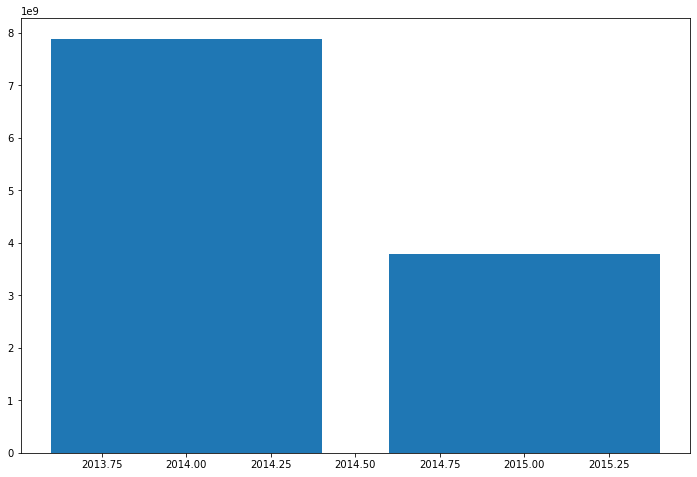

In [40]:
# Crescimento médio de preços de compras dos imóveis por ano.
# Eixo X: Anos
# Eixo Y: Soma dos preços
# Gráfico: Barras

from matplotlib import pyplot as plt

# First graph
df['year'] = pd.to_datetime(df['date']).dt.year
by_year = df[['price', 'year']].groupby('year').sum().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(by_year['year'], by_year['price'])

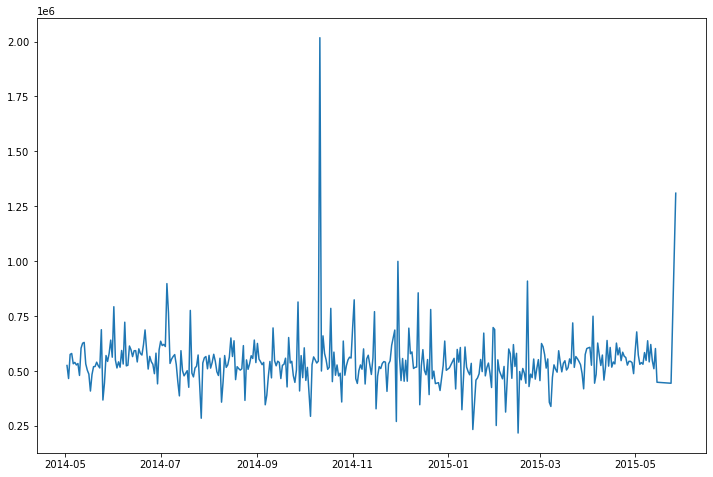

In [42]:
# Second graph
df['day'] = pd.to_datetime(df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(by_day['day'], by_day['price'])

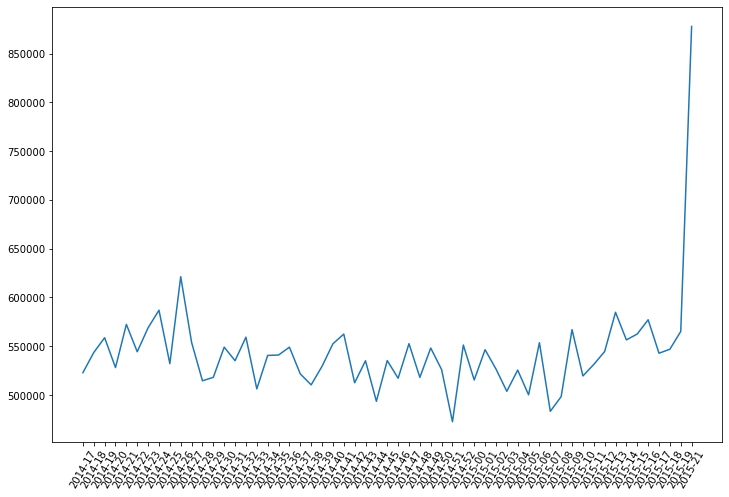

In [54]:
# Third graph
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')
by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

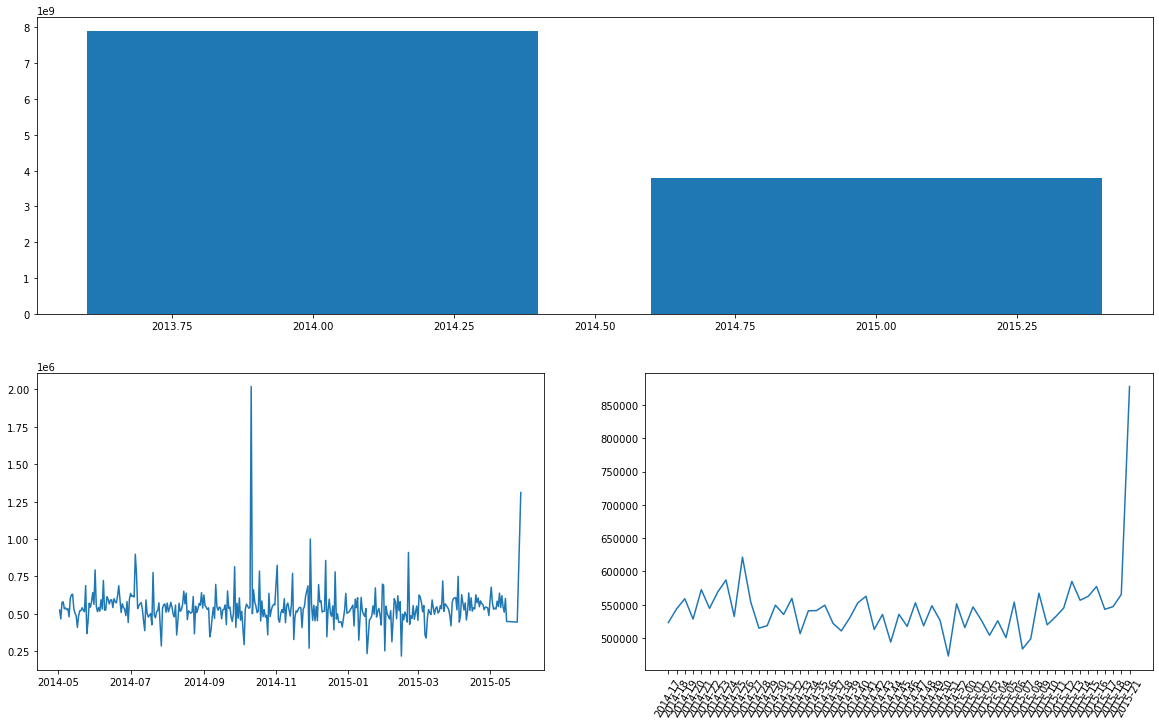

In [56]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) # First row
ax2 = fig.add_subplot(specs[1, 0]) # Second row - First Column
ax3 = fig.add_subplot(specs[1, 1]) # Second row - Second Column



# First graph
df['year'] = pd.to_datetime(df['date']).dt.year
by_year = df[['price', 'year']].groupby('year').sum().reset_index()
ax1.bar(by_year['year'], by_year['price'])

# Second graph
df['day'] = pd.to_datetime(df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()
ax2.plot(by_day['day'], by_day['price'])

# Third graph
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')
by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot(by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

In [61]:
# 10. Gostaria de olhar no mapa e conseguir identificar 
# as casas com o maior preço.
import plotly.express as px

houses = df[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon = 'long',
                        size = 'price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max = 15,
                        zoom = 10)


fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r': 0, 't':0, 'l':0, 'b':0})
fig.show()


# Exercícios

## 1. Crie uma nova coluna chamada: 'dormitory_type'
## - Se o valor da coluna 'bedrooms' for igual à 1 => 'studio'
## - Se o valor da coluna 'bedrooms' for igual à 2 => 'apartament'
## - Se o valor da coluna 'bedrooms' for maior que 2 => 'house'

In [64]:
df['dormitory_type'] = 'no_room'
df.loc[df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,2014,2014-10-13,2014-41,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,1991,98125,47.72,-122.32,1690,7639,2014,2014-12-09,2014-49,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,0,98028,47.74,-122.23,2720,8062,2015,2015-02-25,2015-08,apartament
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,0,98136,47.52,-122.39,1360,5000,2014,2014-12-09,2014-49,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,0,98074,47.62,-122.05,1800,7503,2015,2015-02-18,2015-07,house


## 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

<BarContainer object of 13 artists>

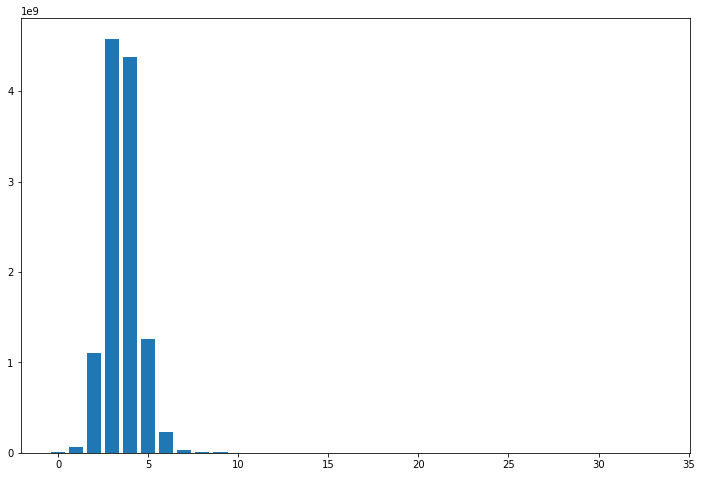

In [66]:
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

## 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

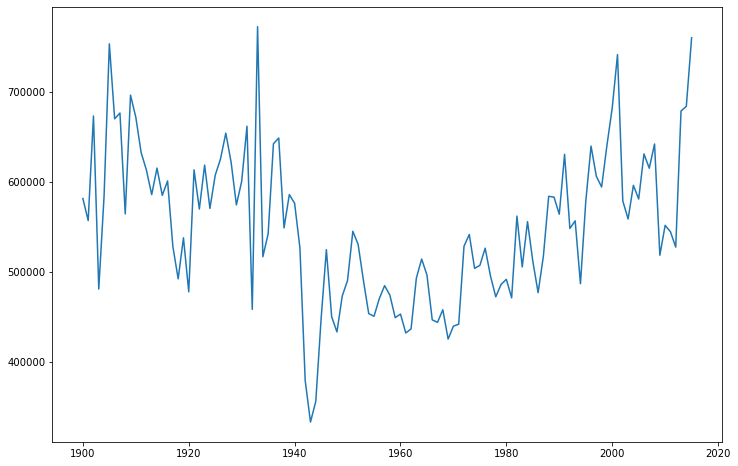

In [68]:
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(by_yr_built['yr_built'], by_yr_built['price'])

## 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<BarContainer object of 4 artists>

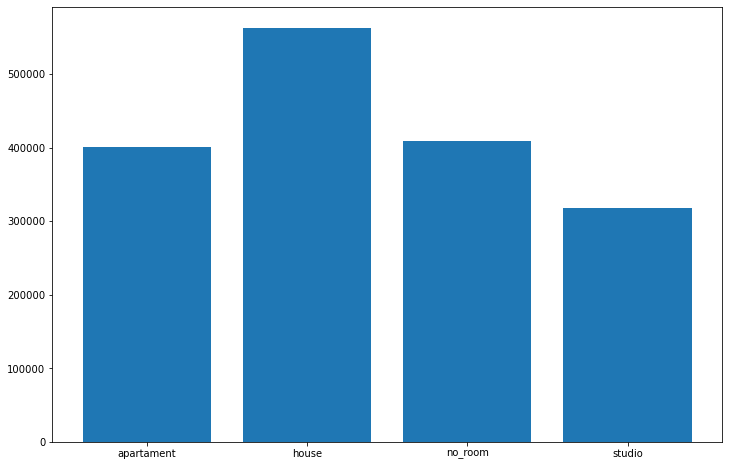

In [72]:
by_dormitory_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(by_dormitory_type['dormitory_type'], by_dormitory_type['price'])


## 5. Faça um gráfico de linha que mostre a evolução média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1990.

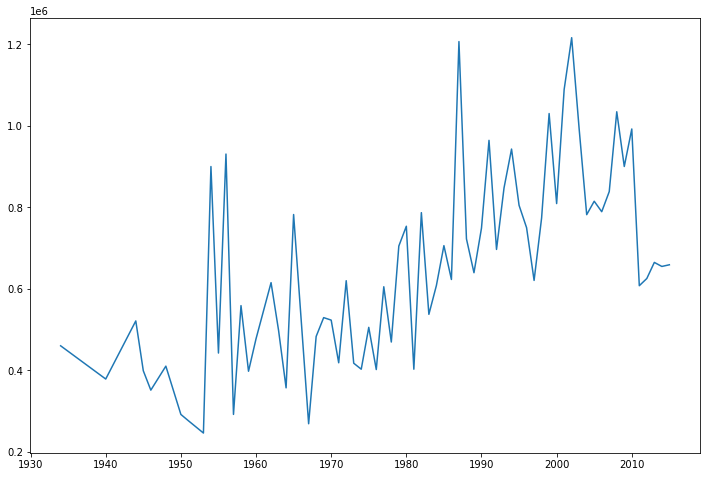

In [91]:
df_renovated = df[df['yr_renovated'] >= 1930]
by_renovated = df_renovated[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(by_renovated['yr_renovated'], by_renovated['price'])

## 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [85]:
df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

,yr_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17
...,...,...,...
309,2014,house,692687.72
310,2014,studio,516500.00
311,2015,apartament,543250.00
312,2015,house,797383.06


## 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 Linha e 2 Colunas)

<BarContainer object of 4 artists>

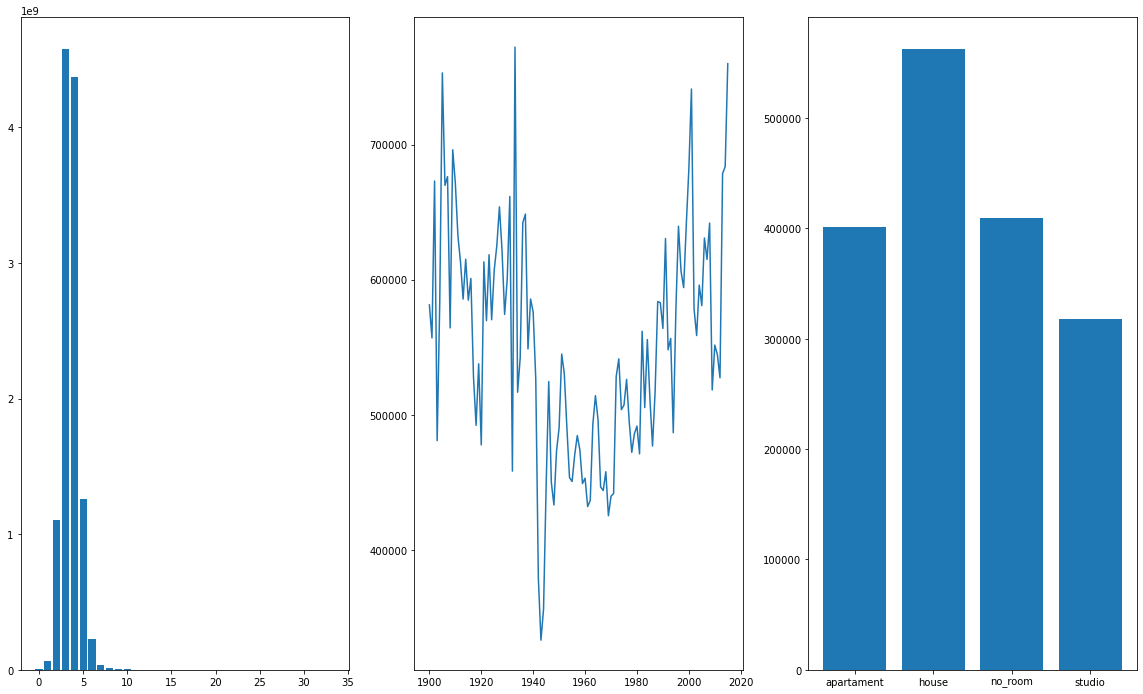

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [92]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) 
ax2 = fig.add_subplot(specs[0, 1]) 
ax3 = fig.add_subplot(specs[0, 2]) 



# 02
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(12, 8))
ax1.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

# 03
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize=(12, 8))
ax2.plot(by_yr_built['yr_built'], by_yr_built['price'])

# 04
by_dormitory_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.figure(figsize=(12, 8))
ax3.bar(by_dormitory_type['dormitory_type'], by_dormitory_type['price'])

## 8. Crie um Dashboard com os gráficos das perguntas 02, 04 (Dashboard: 2 Colunas)

<BarContainer object of 4 artists>

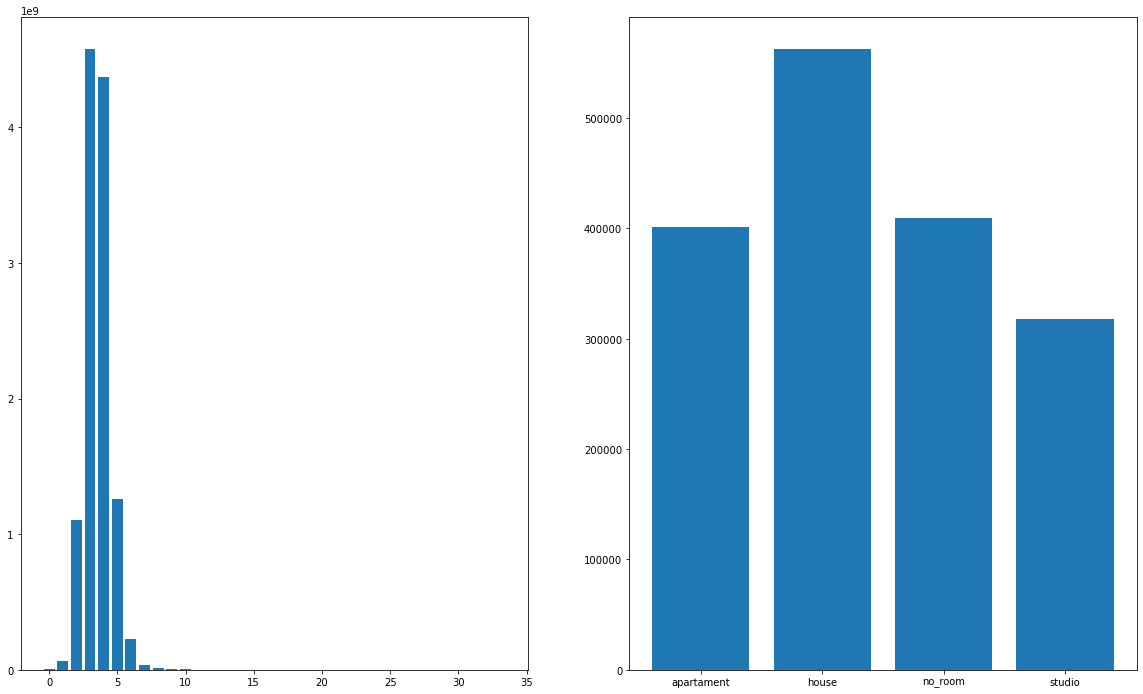

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [93]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1]) 




# 02
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(12, 8))
ax1.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

# 04
by_dormitory_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.figure(figsize=(12, 8))
ax2.bar(by_dormitory_type['dormitory_type'], by_dormitory_type['price'])

## 9. Crie um Dashboard com os gráficos das perguntas 03, 05 (Dashboard: 2 Linhas)

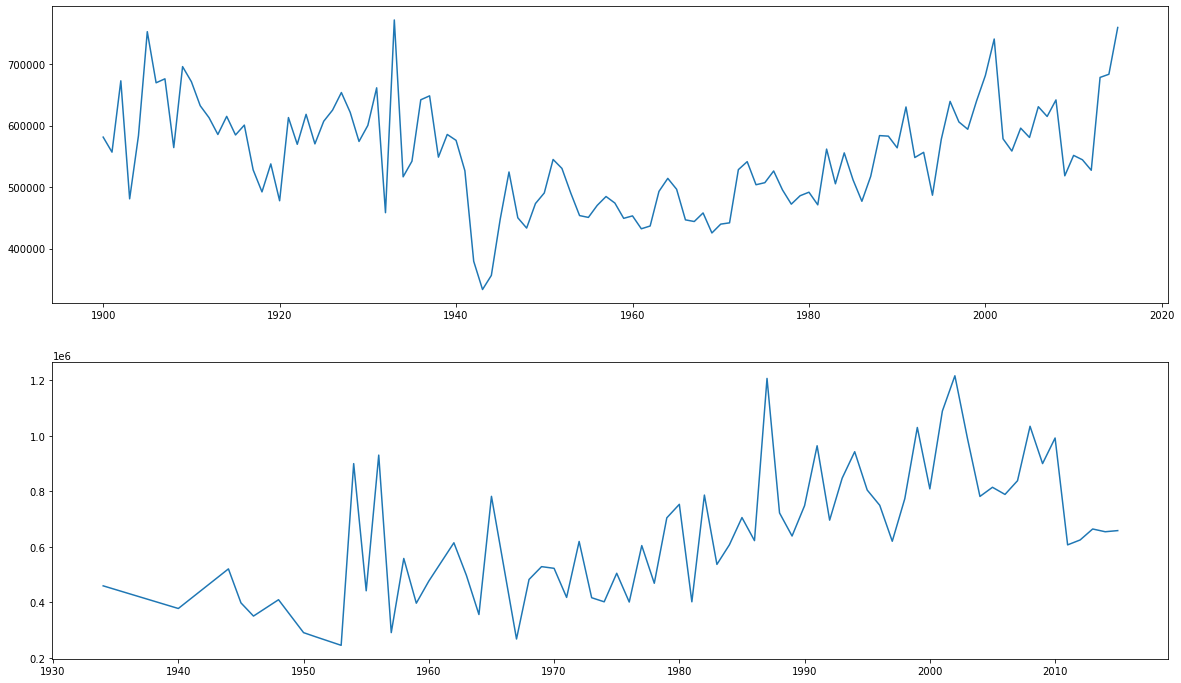

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [94]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0]) 




# 03
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize=(12, 8))
ax1.plot(by_yr_built['yr_built'], by_yr_built['price'])

# 05
by_renovated = df_renovated[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.figure(figsize=(12, 8))
ax2.plot(by_renovated['yr_renovated'], by_renovated['price'])

## 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

In [97]:
import plotly.express as px

houses = df[['id', 'lat', 'long', 'price', 'sqft_living']]

fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon = 'long',
                        size = 'sqft_living',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max = 15,
                        zoom = 10)


fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r': 0, 't':0, 'l':0, 'b':0})
fig.show()